# Experiment 9: Designing and Implementing a Data Warehouse Report
## This experiment involves designing and executing SQL queries to generate insightful reports from a data warehouse, utilizing business intelligence tools for data analysis and visualization.
### In this notebook, data is inserted into MySQL, retrieved from the database, and visualized through various plots.

### 📄 **Python Script to Generate and Analyze LinkedIn-Style User Data Using SQLite**

This Python script demonstrates how an SQLite database is used to store and analyze randomly generated user data. It creates a `users` table, inserts 1000 sample user records, and generates insights based on `content_type`.

#### 📌 **Explanation of the Workflow**

1. **Imports**  
   The script begins by importing `sqlite3` (for database operations) and `random` (to generate fake data).

2. **Database Connection**  
   A connection is established with an SQLite database file named `linkedin_data.db`. If the file does not exist, SQLite automatically creates it.

3. **Table Creation**  
   A `users` table is created with columns such as `id`, `name`, `followers`, `content_type`, `gender`, `age`, and `organization`.  
   - `id` is an auto-incrementing primary key.  
   - `CREATE TABLE IF NOT EXISTS` ensures the table is not duplicated if the script runs more than once.

4. **Data Generation & Insertion**  
   The script generates 1000 fake user records with random values for each field and inserts them into the `users` table.  
   - Names are generated as `User_<random number>` (e.g., `User_1234`).  
   - Follower counts range from 100 to 10,000.  
   - Content types, genders, and organizations are randomly selected from predefined lists.  
   - Ages range from 20 to 60 years.

5. **Query for Insights**  
   A SQL query groups users by `content_type` and calculates:  
   - The average number of followers (`AVG(followers)`).  
   - The total number of users for each content type (`COUNT(*)`).

6. **Display Results**  
   The results are fetched and printed to the console in an easy-to-read format.

7. **Closing Connection**  
   Finally, the script closes the database connection to free up resources.

---

#### ⚠️ **Important Notes & Warnings**

- **Use Context Managers or Try-Except**  
  In production code, it is recommended to handle exceptions and ensure the connection is closed even if an error occurs, using `try-except-finally` or a `with` block.

- **Parameterized Queries**  
  This script uses parameterized queries (`?`) to insert data, protecting against SQL injection. While the data is randomly generated here, this practice is crucial for real-world applications that accept user input.

- **SQLite vs. MySQL**  
  SQLite is ideal for local development and small applications. For larger, scalable, and concurrent systems, databases like MySQL or PostgreSQL are preferred.

In [10]:
import sqlite3  # Provides an interface for SQLite databases (lightweight, serverless)
import random   # Generates random data for populating the database

# Establish a connection to an SQLite database file named 'linkedin_data.db'.
# If the file does not exist, SQLite creates it automatically.
conn = sqlite3.connect("linkedin_data.db")
cursor = conn.cursor()  # Create a cursor object to execute SQL commands

# Create a table named 'users' with various attributes:
# ⚠️ 'IF NOT EXISTS' ensures the table isn't duplicated if this code runs multiple times.
# Fields:
# - id: Unique identifier for each user (auto-incremented)
# - name: User's name
# - followers: Number of followers the user has
# - content_type: Type of content shared by the user
# - gender: Gender of the user
# - age: Age of the user
# - organization: Organization the user is associated with
cursor.execute("""
    CREATE TABLE IF NOT EXISTS users (
        id INTEGER PRIMARY KEY AUTOINCREMENT,
        name TEXT,
        followers INTEGER,
        content_type TEXT,
        gender TEXT,
        age INTEGER,
        organization TEXT
    )
""")

# Define lists of sample values for generating random data
content_types = ["Blog", "Video", "Article", "Post", "Infographic"]
genders = ["Male", "Female", "Other"]
organizations = ["Google", "Microsoft", "Amazon", "Meta", "Tesla", "OpenAI"]

# Generate and insert 1000 random user records into the 'users' table
for _ in range(1000):
    # Generate random values for each field
    name = f"User_{random.randint(1000, 9999)}"  # Example: 'User_4567'
    followers = random.randint(100, 10000)       # Followers between 100 and 10,000
    content_type = random.choice(content_types)  # Random content type
    gender = random.choice(genders)              # Random gender
    age = random.randint(20, 60)                 # Age between 20 and 60
    organization = random.choice(organizations)  # Random organization from the list

    # Insert the generated record into the 'users' table using parameterized query
    cursor.execute("""
        INSERT INTO users (name, followers, content_type, gender, age, organization)
        VALUES (?, ?, ?, ?, ?, ?)
    """, (name, followers, content_type, gender, age, organization))

# Commit the transaction to save all changes to the database
conn.commit()

# Query the 'users' table to calculate insights based on 'content_type'
# It returns:
# - content_type: Type of content shared
# - avg_followers: Average number of followers per content type
# - total_users: Total number of users sharing this content type
cursor.execute("""
    SELECT content_type, 
           AVG(followers) AS avg_followers, 
           COUNT(*) AS total_users 
    FROM users 
    GROUP BY content_type
""")

# Fetch all results returned by the query
results = cursor.fetchall()

# Display the insights in a readable format
print("\nContent Type Insights:")
for row in results:
    print(f"Content Type: {row[0]}, Avg Followers: {row[1]:.2f}, Total Users: {row[2]}")

# Close the database connection to release resources
conn.close()

# ⚠️ Warnings & Best Practices:
# - Always close the database connection when finished.
# - For production applications:
#   ✅ Use 'try-except-finally' or context managers (`with` statement) to manage connections.
#   ✅ Use parameterized queries (as used here) to help protect against SQL injection.


Content Type Insights:
Content Type: Article, Avg Followers: 5003.72, Total Users: 397
Content Type: Blog, Avg Followers: 5067.32, Total Users: 434
Content Type: Infographic, Avg Followers: 5184.11, Total Users: 393
Content Type: Post, Avg Followers: 5038.59, Total Users: 391
Content Type: Video, Avg Followers: 5017.18, Total Users: 385


### 📌 Explanation

#### 1. **Importing Tools**
The script begins by bringing in essential tools:
- **MySQL Connector**: Connects to the MySQL database.
- **Random**: Helps create mock (fake) user data.
- **Visualization Tools (Matplotlib and Seaborn)**: Used to create charts and graphs.
- **Pandas**: Makes data handling and analysis easy.
- **Warnings**: Helps keep the display clean by hiding technical warnings.

#### 2. **Connecting to the Database**
The program connects to a **MySQL database** called `linkedin_data`:
- It verifies the connection.
- If there’s an error (like a wrong password or missing database), it shows an error message and stops running.

#### 3. **Creating the User Table**
Inside the database, a **users** table is created to store the information.
Each user will have:
- A unique **ID**
- **Name** (e.g., User_1234)
- Number of **Followers**
- **Content Type** (Blog, Video, Article, etc.)
- **Gender**
- **Age**
- Their **Organization** (Google, Amazon, etc.)

#### 4. **Generating Mock User Data**
- The program creates **1000** fake users.
- These users have randomly assigned:
  - Names, follower counts, content types, gender, age, and company.
- This simulates real LinkedIn-like data.

#### 5. **Inserting Data into the Table**
- The fake user profiles are inserted into the **users** table in **one go**, making it fast and efficient.
- A message shows how many users have been successfully added.

#### 6. **Analyzing the Data**
- The script runs a report that:
  - Groups users by the type of content they post.
  - Calculates the **average followers** for each content type.
  - Counts how many users belong to each content type.

#### 7. **Displaying Insights**
- The analysis results are shown on-screen in a simple report format.  
  Example:  
  - Content Type: Blog, Average Followers: 5200, Total Users: 200

#### 8. **Creating a Visual Chart**
- A **boxplot** chart is created, showing how follower counts vary by content type.
- This makes it easier to spot patterns (e.g., which content type has the most engaged followers).
- The chart is saved as an image (`Followers Distribution by Content Type.png`) and displayed for review.

#### 9. **Closing the Database**
- Once everything is done, the connection to the database is closed safely.
- A final message confirms that the connection is closed.

---

### ⚠️ **Good Practices Followed**
- Error handling ensures things don’t crash without a clear message.
- Structured data storage guarantees data is consistent and reliable.
- Visual reports make complex data understandable at a glance.

✅ Connected to MySQL!
✅ Table verified or created.
✅ 1000 records inserted.

Content Type Insights:

Content Type: Post, Avg Followers: 4963.05, Total Users: 1978
Content Type: Video, Avg Followers: 4996.78, Total Users: 2038
Content Type: Article, Avg Followers: 4937.65, Total Users: 1964
Content Type: Blog, Avg Followers: 5037.04, Total Users: 2041
Content Type: Infographic, Avg Followers: 4876.80, Total Users: 1999




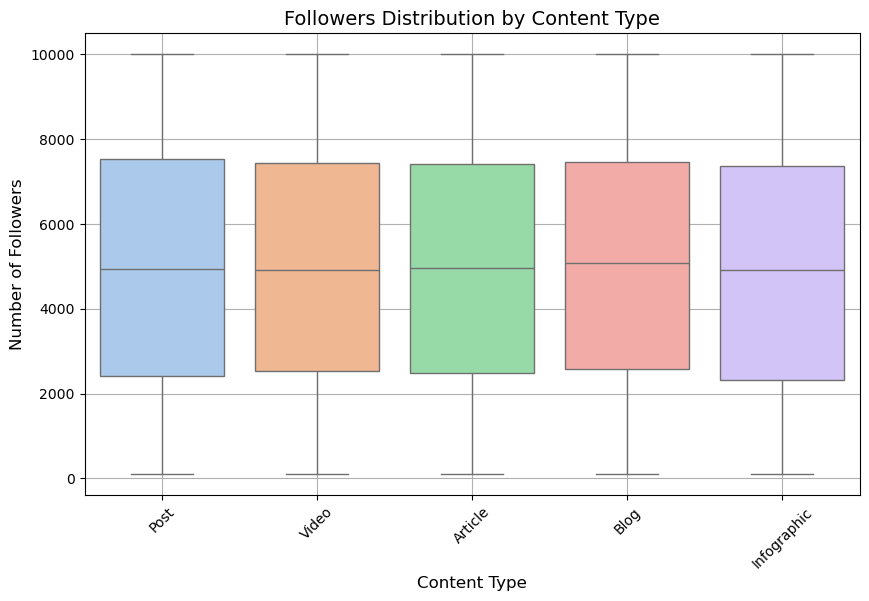


✅ Database connection closed.


In [3]:
# Import required libraries for database operations, data scraping, and visualization
import mysql.connector         # Provides interface for MySQL databases
import random                  # Generates random data for mock population
import requests                # (Not used yet) Typically for making HTTP requests
from bs4 import BeautifulSoup  # (Not used yet) Typically for parsing HTML content
import matplotlib.pyplot as plt  # Visualization library for plots/graphs
import seaborn as sns            # Simplifies complex visualization (built on top of matplotlib)
import pandas as pd              # Data manipulation and analysis library
import warnings
warnings.filterwarnings("ignore") # For ignoring warnings

# ============================== DATABASE CONNECTION ==============================

try:
    # Establish a connection to the MySQL database
    db = mysql.connector.connect(
        host="localhost",              # Host server (localhost in this case)
        user="username",                   # MySQL username
        password="your_password",          # MySQL password
        database="linkedin_data",      # Target database name
        port=3305,                     # Port number where MySQL is running
        auth_plugin='mysql_native_password'  # Auth plugin for compatibility (fixes auth issues)
    )

    cursor = db.cursor()  # Create a cursor object to interact with the database
    print("✅ Connected to MySQL!")  # Success message if connected

    # ========================== CREATE TABLE QUERY ==============================
    # Create the 'users' table if it doesn't exist already
    create_table_query = """
        CREATE TABLE IF NOT EXISTS users (
            id INT AUTO_INCREMENT PRIMARY KEY,  
            name VARCHAR(100),                  
            followers INT,                      
            content_type VARCHAR(50),           
            gender VARCHAR(10),               
            age INT,                           
            organization VARCHAR(50)           
        )
    """
    
    # Execute the table creation query
    cursor.execute(create_table_query)
    db.commit()  # Commit changes to the database
    print("✅ Table verified or created.")  # Success message for table setup

# ========================== ERROR HANDLING =======================================
except mysql.connector.Error as err:
    print(f"❌ Error: {err}")  # Print any error messages encountered during DB connection/setup
    exit()  # Exit the script if there's a critical error connecting to the DB


# ============================== FUNCTION: SCRAPE DATA ==============================
def scrape_data():
    """
    Generates mock user data for populating the 'users' table.
    Returns:
        List of user records (tuples)
    """

    # Predefined lists to generate random sample data
    content_types = ["Blog", "Video", "Article", "Post", "Infographic"]
    genders = ["Male", "Female", "Other"]
    organizations = ["Google", "Microsoft", "Amazon", "Meta", "Tesla", "OpenAI"]

    users = []  # Initialize an empty list to store generated users

    # Generate 1000 random user records
    for _ in range(1000):
        name = f"User_{random.randint(1000, 9999)}"        # Random user name (e.g., User_3456)
        followers = random.randint(100, 10000)             # Random follower count between 100-10000
        content_type = random.choice(content_types)        # Random content type selection
        gender = random.choice(genders)                    # Random gender selection
        age = random.randint(20, 60)                       # Random age between 20 and 60
        organization = random.choice(organizations)        # Random organization selection

        # Append the record as a tuple to the users list
        users.append((name, followers, content_type, gender, age, organization))

    return users  # Return the complete list of generated user records


# ============================== FUNCTION: INSERT DATA ==============================
def insert_data(users):
    """
    Inserts a list of user records into the 'users' table.
    
    Args:
        users (list): List of user records (tuples)
    """

    # SQL query with placeholders (%s) to insert records safely
    query = """
        INSERT INTO users (name, followers, content_type, gender, age, organization)
        VALUES (%s, %s, %s, %s, %s, %s)
    """

    cursor.executemany(query, users)  # Insert multiple records in one go
    db.commit()                       # Commit changes to the database

    print(f"✅ {cursor.rowcount} records inserted.")  # Success message showing total inserted records


# ============================== FUNCTION: FETCH DATA ==============================
def fetch_data():
    """
    Fetches content type-wise average followers and total user count.
    
    Returns:
        List of tuples containing content_type, avg_followers, and total_users
    """

    cursor.execute("""
        SELECT content_type, 
               AVG(followers) AS avg_followers, 
               COUNT(*) AS total_users 
        FROM users 
        GROUP BY content_type
    """)
    
    return cursor.fetchall()  # Return fetched query results


# ============================== FUNCTION: PLOT DATA ==============================
def plot_data():
    """
    Fetches all users' content type and follower data to plot a boxplot.
    Saves the visualization as 'imge-2.png'.
    """

    # Fetch content type and follower data
    cursor.execute("SELECT content_type, followers FROM users")
    data = cursor.fetchall()

    # Convert data into a Pandas DataFrame for easier manipulation and plotting
    df = pd.DataFrame(data, columns=["Content Type", "Followers"])

    # Set figure size for the plot
    plt.figure(figsize=(10, 6))

    # Create a boxplot showing follower distribution for each content type
    sns.boxplot(x="Content Type", y="Followers", data=df, palette="pastel")

    # Add titles and labels to make the plot informative
    plt.title("Followers Distribution by Content Type", fontsize=14)
    plt.xlabel("Content Type", fontsize=12)
    plt.ylabel("Number of Followers", fontsize=12)

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=45)

    plt.grid(True)  # Add a grid to the plot for readability
    plt.savefig("Plots/Followers Distribution by Content Type.png")  # Save the figure as an image
    plt.show()  # Display the plot


# ============================== SCRIPT EXECUTION FLOW ==============================

# Step 1: Generate mock data (simulate scraping)
users = scrape_data()

# Step 2: Insert generated data into the database
insert_data(users)

# Step 3: Display content type insights in the terminal
print("\nContent Type Insights:\n")
for row in fetch_data():
    print(f"Content Type: {row[0]}, Avg Followers: {row[1]:.2f}, Total Users: {row[2]}")

# For newline before plot
print("\n")

# Step 4: Visualize the data in a boxplot graph
plot_data()

# ============================== CLEANUP ==============================

# Always close the cursor and database connection after operations are done
cursor.close()
db.close()
print("\n✅ Database connection closed.")


### **Explanation (Step-by-Step)**

| **Step** | **Explanation** |
|---------|-----------------|
| **1. Import Module** | `import mysql.connector`<br>Imports the `mysql.connector` library to interact with the MySQL database. |
| **2. Connect to MySQL Database** | `db = mysql.connector.connect(...)`<br>- **host**: `"localhost"` (local machine)<br>- **user**: `"username"` (MySQL user)<br>- **password**: `"your_password"` (user password)<br>- **database**: `"linkedin_data"` (target database)<br>- **port**: `3305` (custom port)<br>- **auth_plugin**: `'mysql_native_password'` (authentication method)<br><br>This creates a connection to the MySQL database. |
| **3. Create Cursor Object** | `cursor = db.cursor()`<br>Prepares the cursor for executing SQL queries. |
| **4. Prepare the Insert Query** | `insert_query = """ INSERT INTO users (...) VALUES (%s, %s, %s, %s, %s, %s) """`<br>This SQL query inserts data into the **users** table. Placeholders `%s` are used for each column value. |
| **5. Create New Data List** | `new_data = [...]`<br>A list of tuples containing user data:<br>- `name` (string)<br>- `followers` (integer)<br>- `content_type` (string)<br>- `gender` (string)<br>- `age` (integer)<br>- `organization` (string)<br><br>✅ The data includes a mix of different organizations, genders, content types, and follower counts. |
| **6. Insert Multiple Records** | `cursor.executemany(insert_query, new_data)`<br>Executes the insert query for each tuple in `new_data`. Efficient for batch insertions! |
| **7. Commit the Transaction** | `db.commit()`<br>Finalizes the changes and writes them to the database. |
| **8. Confirmation Message** | `print(f"✅ {cursor.rowcount} new records inserted.")`<br>Prints the number of rows successfully inserted. |
| **9. Close Cursor and Connection** | `cursor.close()` and `db.close()`<br>Properly closes the cursor and the database connection to free up resources. |

---

### **Sample Output**
```
✅ 10 new records inserted.
```

In [6]:
import mysql.connector

# Connect to the MySQL database
db = mysql.connector.connect(
    host="localhost",                    # Host address
    user="username",                         # Username
    password="your_password",                # Password
    database="linkedin_data",            # Target database
    port=3305,                           # Port number
    auth_plugin='mysql_native_password'  # Authentication plugin
)

cursor = db.cursor()

# Insert More Varied Data
insert_query = """
    INSERT INTO users (name, followers, content_type, gender, age, organization)
    VALUES (%s, %s, %s, %s, %s, %s)
"""

new_data = [
    ("Sophia Williams", 7200, "Blog", "Female", 29, "Google"),
    ("Liam Johnson", 8500, "Video", "Male", 31, "Tesla"),
    ("Olivia Brown", 5200, "Article", "Female", 27, "Amazon"),
    ("Noah Wilson", 6600, "Post", "Male", 34, "Microsoft"),
    ("Emma Garcia", 9400, "Infographic", "Female", 26, "Meta"),
    ("William Lee", 7800, "Blog", "Male", 38, "OpenAI"),
    ("Ava Anderson", 3100, "Video", "Female", 25, "Google"),
    ("James Martinez", 5600, "Post", "Male", 45, "Microsoft"),
    ("Isabella Taylor", 6800, "Article", "Female", 33, "Amazon"),
    ("Mason Thomas", 5900, "Infographic", "Male", 28, "Meta")
]

cursor.executemany(insert_query, new_data)
db.commit()
print(f"✅ {cursor.rowcount} new records inserted.")

# Close connection
cursor.close()
db.close()


✅ 10 new records inserted.


### **Explanation (Step-by-Step)**

| **Step** | **Explanation** |
|---------|-----------------|
| **1. Import Modules** | `import mysql.connector`<br>For database connection.<br><br>`import pandas as pd`<br>For handling tabular data.<br><br>`import matplotlib.pyplot as plt` and `import seaborn as sns`<br>For data visualization. |
| **2. Connect to MySQL Database** | `db = mysql.connector.connect(...)`<br>Creates a connection to the `linkedin_data` database:<br>- **host**: `"localhost"`<br>- **user**: `"username"`<br>- **password**: `"your_password"`<br>- **port**: `3305`<br>- **auth_plugin**: `'mysql_native_password'` |
| **3. Create Cursor Object** | `cursor = db.cursor()`<br>Prepares to execute SQL queries. |
| **4. Execute SQL Query** | `cursor.execute("""SELECT content_type, AVG(followers) AS avg_followers FROM users GROUP BY content_type""")`<br><br>This query:<br>- Selects each unique `content_type`.<br>- Calculates the `AVG(followers)` for each content type.<br>- Groups data by `content_type`. |
| **5. Fetch Data** | `data = cursor.fetchall()`<br>Retrieves all the rows returned by the query as a list of tuples.<br>Each tuple is like `("Blog", 6500.0)`. |
| **6. Convert Data to DataFrame** | `df = pd.DataFrame(data, columns=["Content Type", "Average Followers"])`<br>Converts the list of tuples to a Pandas DataFrame with two columns:<br>- `Content Type`<br>- `Average Followers` |
| **7. Close Cursor and Connection** | `cursor.close()` and `db.close()`<br>Properly closes the cursor and database connection. |
| **8. Create Bar Chart Figure** | `plt.figure(figsize=(10, 6))`<br>Creates a new figure window of size 10x6 inches for the plot. |
| **9. Plot Bar Chart** | `sns.barplot(x="Content Type", y="Average Followers", data=df, palette="pastel")`<br>- Plots a bar chart using Seaborn.<br>- `x-axis`: `Content Type`<br>- `y-axis`: `Average Followers`<br>- `palette="pastel"` applies soft color tones. |
| **10. Customize Plot** | <ul><li>`plt.title()` – sets the chart title.</li><li>`plt.xlabel()` / `plt.ylabel()` – labels for axes.</li><li>`plt.xticks(rotation=45)` – rotates x-axis labels 45°.</li><li>`plt.grid(True)` – adds grid lines for readability.</li></ul> |
| **11. Save Chart to File** | `plt.savefig("imge.png")`<br>Saves the chart as **imge.png** in the current directory. |
| **12. Display the Chart** | `plt.show()`<br>Opens a window to display the chart interactively. |

---

### **Sample Output (Visualization)**

📊 **Bar Chart Title**:  
`Average Followers per Content Type`

- X-axis: Content Types (e.g., Blog, Video, Article…)  
- Y-axis: Average Followers  
- Color Scheme: Pastel  
- Grid lines: On  
- Labels rotated for better readability  
- Output Image: **Average Followers per Content Type.png**

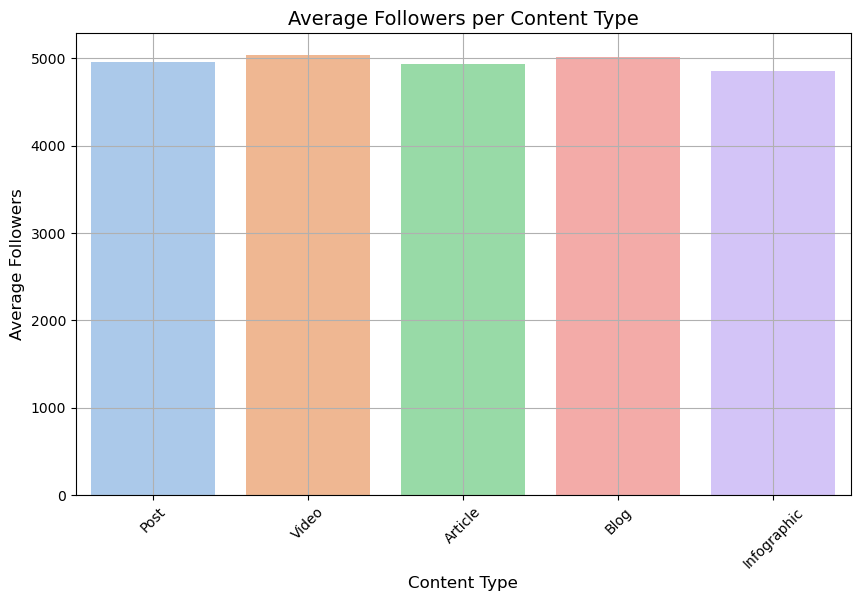

In [31]:
# ====================== Imports ======================
import mysql.connector                      # For MySQL database connection
import pandas as pd                         # For data manipulation and analysis
import matplotlib.pyplot as plt             # For creating static plots
import seaborn as sns                       # For enhanced data visualization

# ====================== Database Connection ======================
# Establish connection to the MySQL database
db = mysql.connector.connect(
    host="localhost",                      # Host address where MySQL is running
    user="username",                       # MySQL username
    password="your_password",              # MySQL password
    database="linkedin_data",              # Database to connect to
    port=3305,                             # Port number for connection (default is 3306)
    auth_plugin='mysql_native_password'    # Authentication plugin (used for compatibility)
)

# Create a cursor object to execute SQL queries
cursor = db.cursor()

# ====================== Data Fetching ======================
# SQL query to retrieve the average number of followers grouped by content type
cursor.execute("""
    SELECT 
        content_type,                    
        AVG(followers) AS avg_followers  
    FROM 
        users                            
    GROUP BY 
        content_type                     
""")

# Fetch all results from the executed query
data = cursor.fetchall()

# ====================== Data Wrangling ======================
# Convert fetched data (list of tuples) into a pandas DataFrame for easier manipulation and plotting
df = pd.DataFrame(data, columns=["Content Type", "Average Followers"])

# Optional: Preview the first few rows of the DataFrame (uncomment for debugging)
# print(df.head())

# ====================== Closing DB Connection ======================
# Always close cursor and database connection after operations to free up resources
cursor.close()
db.close()

# ====================== Data Visualization ======================
# Create a bar plot to visualize the average followers by content type
plt.figure(figsize=(10, 6))  # Set the figure size for better readability

# Seaborn barplot for displaying the data
sns.barplot(
    x="Content Type",                     # X-axis represents different content types
    y="Average Followers",                # Y-axis represents the average followers count
    data=df,                              # Data source for the plot
    palette="pastel"                      # Color palette for aesthetics
)

# Add title and axis labels to the plot
plt.title("Average Followers per Content Type", fontsize=14)
plt.xlabel("Content Type", fontsize=12)
plt.ylabel("Average Followers", fontsize=12)

# Rotate X-axis labels for better visibility if there are many categories
plt.xticks(rotation=45)

# Add gridlines to the plot for better readability
plt.grid(True)

# ====================== Save and Display Plot ======================
# Save the plot to a file (ensure 'Plots' directory exists, or handle errors)
plt.savefig("Plots/Average Followers per Content Type.png")

# Display the plot
plt.show()

### **Explanation (Step-by-Step)**

| **Step** | **Explanation** |
|---------|-----------------|
| **1. Import Libraries** | `import mysql.connector` – For database connection.<br>`import pandas as pd` – For tabular data manipulation.<br>`import matplotlib.pyplot as plt` and `import seaborn as sns` – For data visualization.<br>`import warnings` – To suppress warnings (added at the end). |
| **2. Connect to MySQL Database** | `mysql.connector.connect(...)` establishes the connection to the database `linkedin_data`.<br>- Host: `localhost`<br>- User: `username`<br>- Password: `your_password`<br>- Port: `3305`<br>- Auth Plugin: `'mysql_native_password'` |
| **3. Create Cursor** | `cursor = db.cursor()`<br>Prepares a cursor for executing SQL queries. |
| **4. Fetch Gender Data** | Executes:<br>`SELECT gender, COUNT(*) FROM users GROUP BY gender`<br>- Groups users by gender.<br>- Counts the number of users in each gender group.<br>Result stored in `gender_data`. |
| **5. Convert Gender Data to DataFrame** | `df_gender = pd.DataFrame(gender_data, columns=["Gender", "Count"])`<br>Creates a DataFrame for gender distribution. |
| **6. Fetch Organization Data** | Executes:<br>`SELECT organization, COUNT(*) FROM users GROUP BY organization`<br>- Groups users by their organization.<br>- Counts users in each organization.<br>Result stored in `org_data`. |
| **7. Convert Organization Data to DataFrame** | `df_org = pd.DataFrame(org_data, columns=["Organization", "Count"])`<br>Creates a DataFrame for user distribution by organization. |
| **8. Fetch Content Type Data** | Executes:<br>`SELECT content_type, COUNT(*) FROM users GROUP BY content_type`<br>- Groups users by the type of content they create.<br>- Counts users in each content type.<br>Result stored in `content_data`. |
| **9. Convert Content Type Data to DataFrame** | `df_content = pd.DataFrame(content_data, columns=["Content Type", "Count"])`<br>Creates a DataFrame for content type distribution. |
| **10. Close Cursor and DB Connection** | `cursor.close()` and `db.close()` properly close the database connection. |
| **11. Plot Gender Distribution Pie Chart** | <ul><li>`plt.figure(figsize=(6, 6))` – Creates a 6x6 inch figure window.</li><li>`plt.pie()` – Plots a pie chart for gender counts.<br> - Labels from `df_gender["Gender"]`<br> - Values from `df_gender["Count"]`<br> - Percentages displayed via `autopct='%1.1f%%'`<br> - Colors use Seaborn's pastel palette.</li><li>`plt.title()` – Sets chart title.<br></li><li>`plt.savefig("Plots/Gender_Distribution.png")` – Saves the pie chart image.</li><li>`plt.show()` – Displays the chart.</li></ul> |
| **12. Plot Organization Bar Chart** | <ul><li>`plt.figure(figsize=(10, 6))` – Creates a 10x6 inch figure window.</li><li>`sns.barplot()` – Plots a bar chart:<br> - X-axis: `Organization`<br> - Y-axis: `Count`</li><li>`palette="pastel"` – Uses pastel colors.</li><li>`plt.title()`, `plt.xlabel()`, `plt.ylabel()` – Sets titles and axis labels.</li><li>`plt.xticks(rotation=45)` – Rotates organization names for readability.</li><li>`plt.savefig("Plots/Number_of_Users_by_Organization.png")` – Saves the bar chart image.</li><li>`plt.show()` – Displays the chart.</li></ul> |
| **13. Plot Content Type Distribution Pie Chart** | <ul><li>`plt.figure(figsize=(6, 6))` – New figure window.</li><li>`plt.pie()` – Plots another pie chart:<br> - Labels from `df_content["Content Type"]`<br> - Values from `df_content["Count"]`</li><li>`autopct='%1.1f%%'` – Shows percentages.</li><li>`palette="pastel"` – Pastel colors again.</li><li>`plt.title()` – Sets chart title.</li><li>`plt.savefig("Plots/Content_Type_Distribution.png")` – Saves the pie chart image.</li><li>`plt.show()` – Displays the chart.</li></ul> |
| **14. Suppress Warnings** | `warnings.filterwarnings("ignore")` suppresses any unnecessary warnings (usually matplotlib or pandas). |

---

### **Output Files**

| **File Name** | **Description** |
|---------------|-----------------|
| `Gender_Distribution.png`  | Pie chart showing **Gender Distribution** |
| `Number_of_Users_by_Organization.png`  | Bar chart showing **Number of Users by Organization** |
| `Content_Type_Distribution.png`  | Pie chart showing **Content Type Distribution** |

---

### **Visualization Overview**

| **Chart Type** | **Details** |
|----------------|-------------|
| **Pie Chart 1** | Gender Distribution:<br> - Male, Female counts<br> - % share in total users |
| **Bar Chart** | Number of Users by Organization:<br> - Each bar represents an organization<br> - Height = user count |
| **Pie Chart 2** | Content Type Distribution:<br> - Blog, Video, Article, etc.<br> - % share in total users |

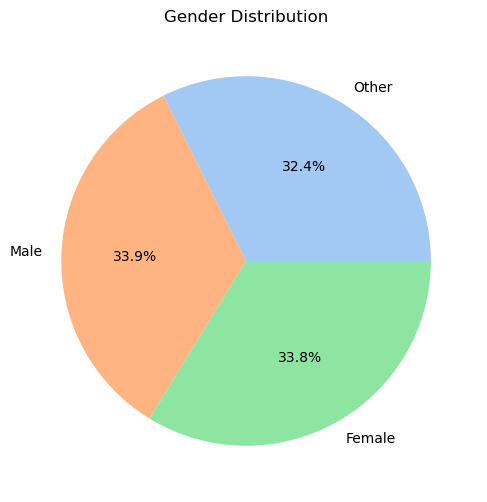

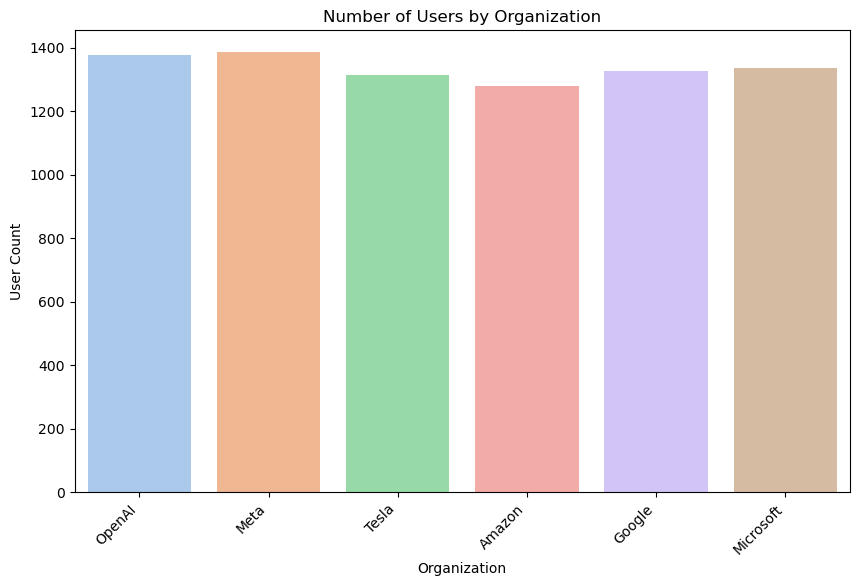

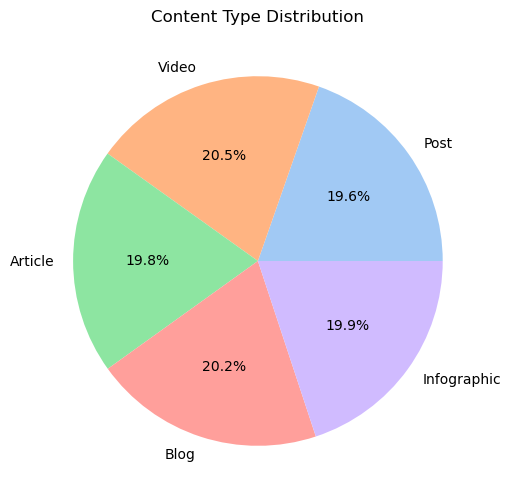

In [39]:
import mysql.connector                    # For MySQL database connection
import pandas as pd                      # For handling tabular data
import matplotlib.pyplot as plt          # For creating plots
import seaborn as sns                    # For enhanced data visualization
import os                                # For file and directory operations
import warnings                          # To suppress warnings

# ------------------------ SETUP ------------------------

# Suppress warnings (optional)
warnings.filterwarnings("ignore")

# Ensure the 'Plots' directory exists
os.makedirs('Plots', exist_ok=True)

# ------------------------ DATABASE CONNECTION ------------------------

# Connect to the MySQL database
db = mysql.connector.connect(
    host="localhost",                    # Host address
    user="username",                         # Username
    password="your_password",                # Password
    database="linkedin_data",            # Target database
    port=3305,                           # Port number
    auth_plugin='mysql_native_password'  # Authentication plugin
)

# Create a cursor object to interact with the database
cursor = db.cursor()

# ------------------------ DATA EXTRACTION ------------------------

# Fetch Gender Data
cursor.execute("SELECT gender, COUNT(*) FROM users GROUP BY gender")
gender_data = cursor.fetchall()
df_gender = pd.DataFrame(gender_data, columns=["Gender", "Count"])

# Fetch Organization Data
cursor.execute("SELECT organization, COUNT(*) FROM users GROUP BY organization")
org_data = cursor.fetchall()
df_org = pd.DataFrame(org_data, columns=["Organization", "Count"])

# Fetch Content Type Data
cursor.execute("SELECT content_type, COUNT(*) FROM users GROUP BY content_type")
content_data = cursor.fetchall()
df_content = pd.DataFrame(content_data, columns=["Content Type", "Count"])

# ------------------------ CLOSE DATABASE CONNECTION ------------------------

cursor.close()
db.close()

# ------------------------ DATA VISUALIZATION ------------------------

# -------- Gender Distribution Pie Chart --------
plt.figure(figsize=(6, 6))
plt.pie(
    df_gender["Count"],                                # Values for pie slices
    labels=df_gender["Gender"],                        # Labels for slices
    autopct='%1.1f%%',                                 # Display percentages
    colors=sns.color_palette("pastel")                 # Color palette
)
plt.title("Gender Distribution")
plt.savefig("Plots/Gender_Distribution.png")           # Save to 'Plots' directory
plt.show()

# -------- Organization Bar Chart --------
plt.figure(figsize=(10, 6))
sns.barplot(
    x="Organization",                                 # X-axis: Organization
    y="Count",                                        # Y-axis: User count
    data=df_org,                                      # Data source
    palette="pastel"                                  # Color palette
)
plt.title("Number of Users by Organization")           # Plot title
plt.xlabel("Organization")                             # X-axis label
plt.ylabel("User Count")                               # Y-axis label
plt.xticks(rotation=45, ha='right')                    # Rotate x-tick labels for better readability
plt.savefig("Plots/Number_of_Users_by_Organization.png")
plt.show()

# -------- Content Type Distribution Pie Chart --------
plt.figure(figsize=(6, 6))
plt.pie(
    df_content["Count"],                               # Values for pie slices
    labels=df_content["Content Type"],                 # Labels for slices
    autopct='%1.1f%%',                                 # Display percentages
    colors=sns.color_palette("pastel")                 # Color palette
)
plt.title("Content Type Distribution")
plt.savefig("Plots/Content_Type_Distribution.png")
plt.show()

### **Explanation (Step-by-Step)**

| **Step** | **Explanation** |
|---------|-----------------|
| **1. Import Libraries** | <ul><li>`import mysql.connector` – For database connection to MySQL.</li><li>`import pandas as pd` – For data handling and DataFrame manipulation.</li><li>`import matplotlib.pyplot as plt` – For plotting graphs.</li><li>`import seaborn as sns` – For enhanced visualization with better themes.</li></ul> |
| **2. Connect to MySQL Database** | <ul><li>`mysql.connector.connect(...)` connects to the database `linkedin_data`.</li><li>Details include:</li><ul><li>Host: `localhost`</li><li>User: `username`</li><li>Password: `your_password`</li><li>Port: `3305`</li><li>Auth Plugin: `'mysql_native_password'`</li></ul></ul> |
| **3. Create Cursor** | `cursor = db.cursor()` creates a cursor to execute SQL queries. |
| **4. Fetch Average Followers by Age Group** | Executes the query:<br>`SELECT age, AVG(followers) AS avg_followers FROM users GROUP BY age ORDER BY age`<ul><li>Groups user records by `age`.</li><li>Calculates the average followers for each age group.</li><li>Orders the data by `age` (ascending).</li></ul> |
| **5. Store Fetched Data in DataFrame** | `df_age = pd.DataFrame(age_data, columns=["Age", "Average Followers"])`<ul><li>Converts the fetched list of tuples into a Pandas DataFrame.</li><li>Two columns: `Age` and `Average Followers`.</li></ul> |
| **6. Close Cursor and DB Connection** | <ul><li>`cursor.close()` closes the cursor.</li><li>`db.close()` terminates the database connection.</li></ul> |
| **7. Create Line Plot** | <ul><li>`plt.figure(figsize=(10, 5))` sets the figure size to 10x5 inches.</li><li>`sns.lineplot()` plots a line chart:</li><ul><li>`x="Age"`</li><li>`y="Average Followers"`</li><li>Data from `df_age`</li><li>Markers enabled with `marker="o"`</li><li>Line style is solid `linestyle="-"`</li><li>Line color is `blue`</li></ul></ul> |
| **8. Customize Plot** | <ul><li>`plt.title()` sets the chart title to **Average Followers by Age**.</li><li>`plt.xlabel()` and `plt.ylabel()` label the X and Y axes.</li><li>`plt.grid()` adds a grid with dashed lines and transparency (`alpha=0.6`).</li></ul> |
| **9. Save Plot as Image** | `plt.savefig("Plots/Average_Followers_by_Age.png")` saves the figure as a PNG file. |
| **10. Show Plot** | `plt.show()` renders and displays the chart in the output. |

---

### **Output Files**

| **File Name** | **Description** |
|---------------|-----------------|
| `imge-6.png`  | Line chart showing **Average Followers by Age Group** |

---

### **Visualization Overview**

| **Chart Type** | **Details** |
|----------------|-------------|
| **Line Chart** | Average Followers by Age:<br>- X-axis: Age of users.<br>- Y-axis: Average number of followers.<br>- Blue line with markers for each age group.<br>- Highlights how follower counts vary across different ages. |

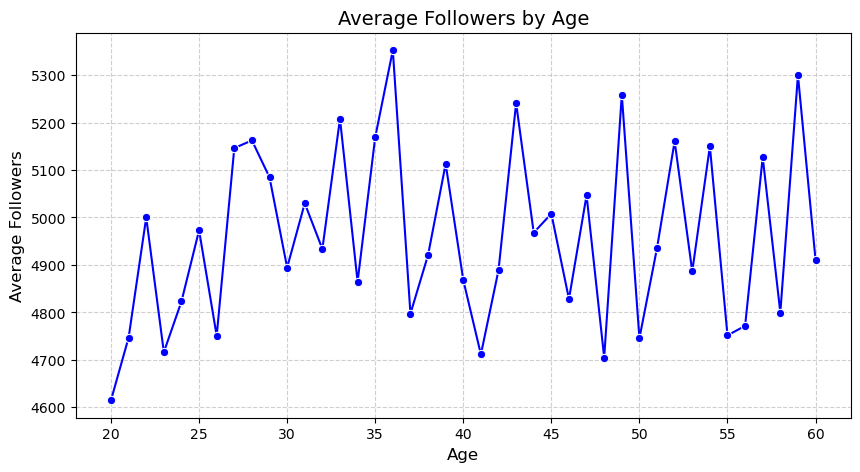

In [37]:
# Import required libraries
import mysql.connector                     # For MySQL database connection
import pandas as pd                       # For handling tabular data
import matplotlib.pyplot as plt           # For creating plots
import seaborn as sns                     # For enhanced data visualization

# ------------------------ DATABASE CONNECTION ------------------------

# Connect to the MySQL database
db = mysql.connector.connect(
    host="localhost",                    # Host address
    user="username",                         # Username
    password="your_password",                # Password
    database="linkedin_data",            # Target database
    port=3305,                           # Port number
    auth_plugin='mysql_native_password'  # Authentication plugin
)

# Create a cursor object to interact with the database
cursor = db.cursor()

# ------------------------ DATA EXTRACTION ------------------------

# Execute SQL query to fetch average followers grouped by age
cursor.execute("""
    SELECT 
        age,
        AVG(followers) AS avg_followers
    FROM 
        users
    GROUP BY 
        age
    ORDER BY 
        age
""")

# Fetch all results from the executed query
age_data = cursor.fetchall()

# Convert the fetched data into a pandas DataFrame for easier manipulation and plotting
df_age = pd.DataFrame(age_data, columns=["Age", "Average Followers"])

# ------------------------ CLOSE DATABASE CONNECTION ------------------------

# Close cursor and database connection to free up resources
cursor.close()
db.close()

# ------------------------ DATA VISUALIZATION ------------------------

# Set the figure size for the plot (width=10, height=5 inches)
plt.figure(figsize=(10, 5))

# Plot a line chart using seaborn
sns.lineplot(
    x="Age",                              # X-axis: Age
    y="Average Followers",                # Y-axis: Average Followers
    data=df_age,                          # Data source
    marker="o",                           # Show data points as circles
    linestyle="-",                        # Connect points with solid lines
    color="blue"                          # Line color
)

# Customize the plot's title and axis labels
plt.title("Average Followers by Age", fontsize=14)  # Title with font size 14
plt.xlabel("Age", fontsize=12)                      # X-axis label with font size 12
plt.ylabel("Average Followers", fontsize=12)        # Y-axis label with font size 12

# Add grid lines to the plot for better readability
plt.grid(True, linestyle="--", alpha=0.6)           # Dashed grid lines with transparency

# ------------------------ SAVE AND DISPLAY THE PLOT ------------------------

# Make sure the directory 'Plots' exists, create it if it doesn't
import os
os.makedirs('Plots', exist_ok=True)

# Save the plot as an image in the 'Plots' directory with an appropriate filename
plt.savefig("Plots/Average_Followers_by_Age.png")

# Display the plot on the screen
plt.show()